In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10

pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)

In [2]:
df = pd.read_csv("uk_econcomic.csv")

1.	Crude birth rate and death rate per year
2.	Life expectancy total and compare with male and female per year
3.	Population Vs GDP use year as hue. GDP has dropped as population increased. 2007 was the most than fell during recession.  2014 and than dropped again
4.	Divide GDP growth or amount into two groups and plot one beside the other. Year from 1973 – 1994, 1995-2017
5.	Imports vs exports.. imports have increased than exports
6.	Merchandise imports and exports of UK. Have an eye on the y-axis. Imports for agriculture, food and fuel are more than exports. Manufacturing and ores exports are more than imports.
7.	Commercial service: Insurance and Computer import is higher than exports but travel and transport services import is higher than exports. Both 5 and 6 means that poor and people not living in urban area were more hit.
8.	% or rural and % of urban is a better indicator because of the same scale. Make a plot with numbers and say it is not good. Plot rural vs another with hue as year and it shows that there is a decrease 
9.	Youth unemployment : most affected with 2004 starting unlike just around recession. Check for other countries
10.	Part time employment for females is twice as much as for males. No need for labour participation


In [4]:
#Two plots if neeeded
# sns.set(style="whitegrid")
# # Initialize the matplotlib figure
# #f, ax = plt.subplots(figsize=(30, 4))
# #two plots together
# f, (ax1, ax2) = plt.subplots(2,figsize=(50, 30))

# sns.lineplot(x= "Year",y='Birth rate, crude (per 1,000 people)',  data=dfe, ax=ax1)
# sns.lineplot(x="Year", y="Death rate, crude (per 1,000 people)", data=dfe, ax=ax2)

# # Plot the total crashes
# sns.set_color_codes("deep")
# #sns.scatterplot(x="Year", y='GDP (current US$)', data=dfe, color="r")
# #sns.despine()
# # plt.title('Total GDP in UK ', fontsize= 15)
# # plt.xlabel('Year', fontsize= 15)
# # plt.ylabel('GDP (current US$)', fontsize= 15)
# # plt.show()

###### Divide years into section to compare the difference between the 8 years after the first recession in UK  sincee joining the eu and the other 8 years before leaving the eu

In [46]:
#list(df['Year'])

In [54]:
df1 = df[df['Year'].isin([
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 ])]

df2 = df[df['Year'].isin([
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,2016
 ])]

#### Find when the recession happened and change the dataset up

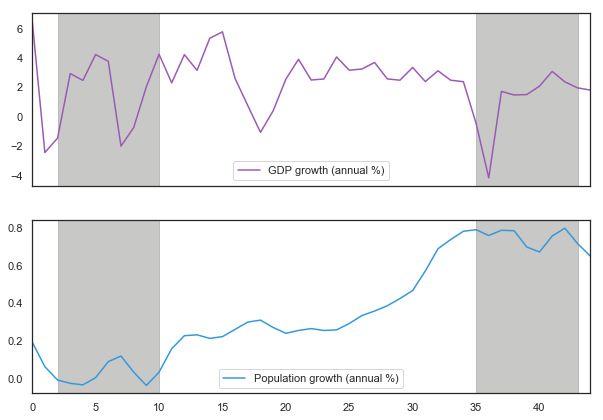

In [55]:
#ahttp://www.blackarbs.com/blog/advanced-time-series-plots-in-python/1/6/2017
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

# now we can grab the indices for the start
# and end of each recession
recs2k_bgn = df1.index[0]
recs2k_end = df1.index[-1]

recs2k8_bgn = df2.index[0]
recs2k8_end = df2.index[-1]
# Let's plot SPX and VIX cumulative returns with recession overlay
plot_cols = ['GDP growth (annual %)', 'Population growth (annual %)']

# 2 axes for 2 subplots

fig, axes = plt.subplots(2,1, figsize=(10,7), sharex=True)
df[plot_cols].plot(subplots=True, ax=axes)
for ax in axes:
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)


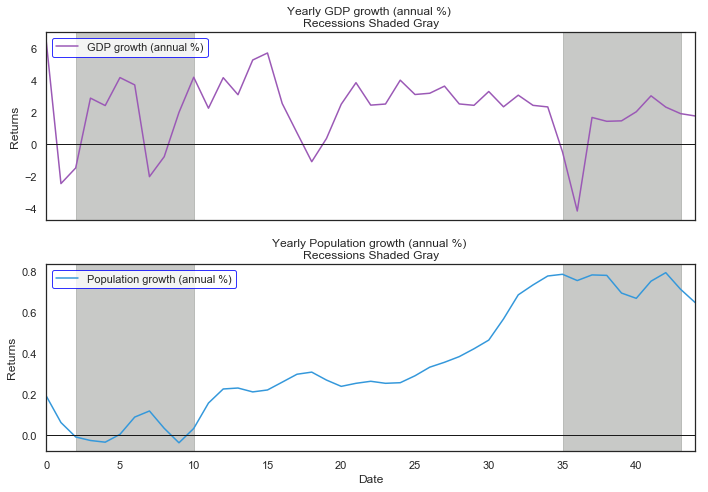

In [56]:
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

# now we can grab the indices for the start
# and end of each recession
recs2k_bgn = df1.index[0]
recs2k_end = df1.index[-1]

recs2k8_bgn = df2.index[0]
recs2k8_end = df2.index[-1]
# Let's plot SPX and VIX cumulative returns with recession overlay
plot_cols = ['GDP growth (annual %)', 'Population growth (annual %)']

# 2 axes for 2 subplots

fig, axes = plt.subplots(2,1, figsize=(10,7), sharex=True)
df[plot_cols].plot(subplots=True, ax=axes)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, plot_cols):
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    # lets add horizontal zero lines
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    
    # add titles
    ax.set_title('Yearly ' + col + ' \nRecessions Shaded Gray')
    
    # add axis labels
    ax.set_ylabel('Returns')
    ax.set_xlabel('Date')
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  

# now to use tight layout
plt.tight_layout()

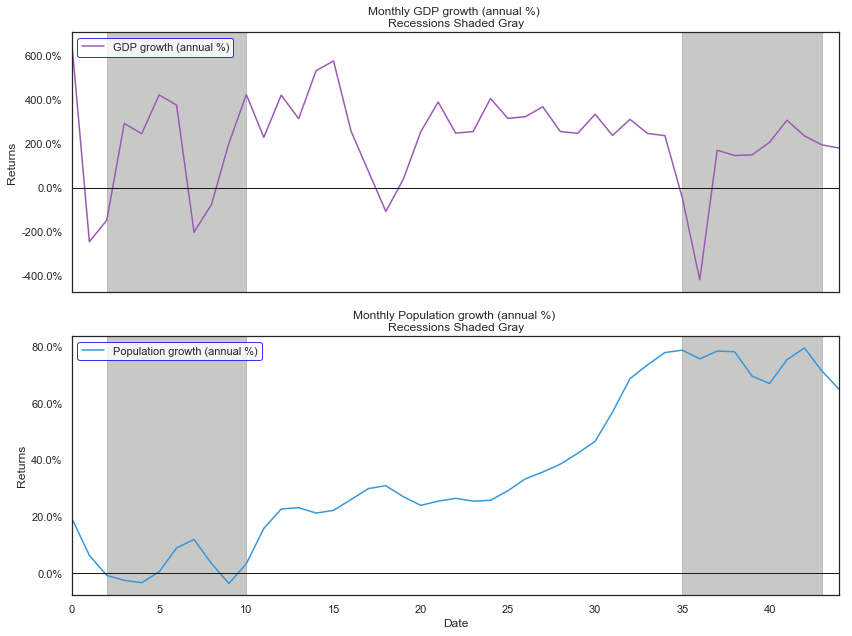

In [57]:
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

# now we can grab the indices for the start
# and end of each recession
recs2k_bgn = df1.index[0]
recs2k_end = df1.index[-1]

recs2k8_bgn = df2.index[0]
recs2k8_end = df2.index[-1]
# Let's plot SPX and VIX cumulative returns with recession overlay
plot_cols = ['GDP growth (annual %)', 'Population growth (annual %)']

# better but I prefer more advanced axis tick labels

fig, axes = plt.subplots(2,1, figsize=(12,9), sharex=True)
df[plot_cols].plot(subplots=True, ax=axes)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, plot_cols):
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    # lets add horizontal zero lines
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    
    # add titles
    ax.set_title('Monthly ' + col + ' \nRecessions Shaded Gray')
    
    # add axis labels
    ax.set_ylabel('Returns')
    ax.set_xlabel('Date')
    
    # upgrade axis tick labels
    yticks = ax.get_yticks()
    ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in yticks]);

    #dates_rng = pd.date_range(df.index[0], df.index[-1], freq='6M')
    #plt.xticks(dates_rng, [dtz.strftime('%Y-%m') for dtz in dates_rng], rotation=45)
   
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  

# now to use tight layout
plt.tight_layout()

In [58]:
pd.date_range(df.index[0], df.index[-1], freq='6M')

DatetimeIndex([], dtype='datetime64[ns]', freq='6M')

In [59]:
range(len(list(df['Year'][::2])))

range(0, 23)

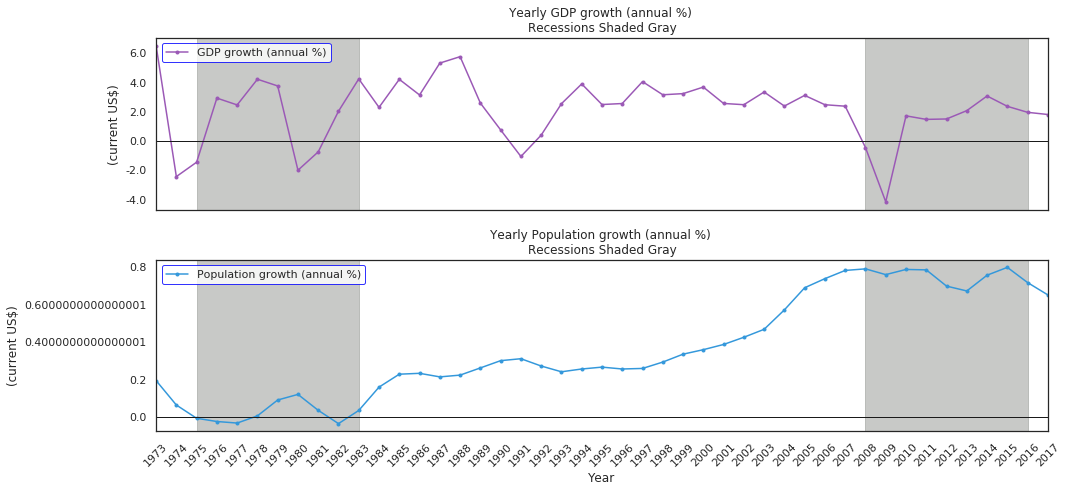

In [60]:
import matplotlib as mpl
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

# now we can grab the indices for the start
# and end of each recession
recs2k_bgn = df1.index[0]
recs2k_end = df1.index[-1]

recs2k8_bgn = df2.index[0]
recs2k8_end = df2.index[-1]
# Let's plot SPX and VIX cumulative returns with recession overlay
plot_cols = ['GDP growth (annual %)', 'Population growth (annual %)']

# I want markers for the data points, and change to font

mpl.rcParams['font.family'] = 'Ubuntu Mono'
fig, axes = plt.subplots(2,1, figsize=(15,7), sharex=True)
df[plot_cols].plot(subplots=True, ax=axes, marker='o', ms=3)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, plot_cols):
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    # lets add horizontal zero lines
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    
    # add titles
    ax.set_title('Yearly ' + col + ' \nRecessions Shaded Gray')
    
    # add axis labels
    ax.set_ylabel('(current US$)')
    ax.set_xlabel('Year')
    
    # upgrade axis tick labels
    yticks = ax.get_yticks()
    ax.set_yticklabels(['{}'.format(x) for x in yticks]);

    #dates_rng = pd.date_range(df.index[0], df.index[-1], freq='6M')
    #plt.xticks(dates_rng, [dtz.strftime('%Y-%m') for dtz in dates_rng], rotation=45)
    plt.xticks(range(len(list(df['Year']))),list(df['Year']), rotation = 45)
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  

# now to use tight layout
plt.tight_layout()

In [88]:
'GDP growth (annual %)'.split('(')[0]

'GDP growth '

In [77]:
# I want to know show the global max and mins and their dates

# --------------------------------------------------------------- #
# MAX SPX Returns
spx_max_ = df[plot_cols[0]].max()
spx_max_idx_ = df[plot_cols[0]].idxmax(axis=0, skipna=True)

# MIN SPX Returns
spx_min_ = df[plot_cols[0]].min()
spx_min_idx_ = df[plot_cols[0]].idxmin(axis=0, skipna=True)

# MAX VIX Returns
vix_max_ = df[plot_cols[1]].max()
vix_max_idx_ = df[plot_cols[1]].idxmax(axis=0, skipna=True)

# MIN VIX Returns
vix_min_ = df[plot_cols[1]].min()
vix_min_idx_ = df[plot_cols[1]].idxmin(axis=0, skipna=True)

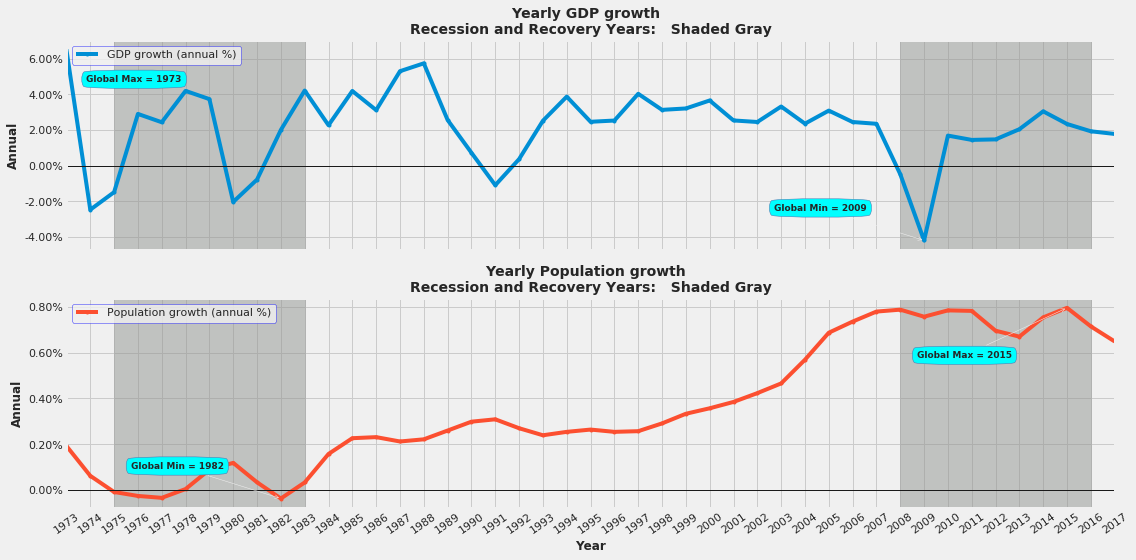

In [263]:
mpl.rcParams['font.family'] = 'Ubuntu Mono'
fig, axes = plt.subplots(2,1, figsize=(16,8), sharex=True)
df[plot_cols].plot(subplots=True, ax=axes, marker='o', ms=3)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, plot_cols):
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    # lets add horizontal zero lines
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    
    # add titles
    ax.set_title('Yearly ' + col.split('(')[0] + ' \nRecession and Recovery Years:   Shaded Gray', fontsize=14, fontweight='demi')
    
    # add axis labels
    ax.set_ylabel('Annual', fontsize=12, fontweight='demi')
    ax.set_xlabel('Year', fontsize=12, fontweight='demi')
    
    # upgrade axis tick labels
    #yticks = ax.get_yticks()
    #ax.set_yticklabels(['{}'.format(x) for x in yticks]);

    #skip every one x-tick for cleanliness
    plt.setp(ax1.get_xticklabels()[::2], visible=False)
    #plt.xticks([t.get_text().split("T")[0] for t in ax1.get_xticklabels()])
    plt.xticks(range(len(list(df['Year']))),list(df['Year']), rotation = 35)
    
    
    # bold up tick axes
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.2f}%'.format))
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')
    
    # lighten ticks and labels
    #ax.tick_params(colors='gray', direction='out')
    #for tick in ax.get_xticklabels():
        #tick.set_color('gray')
    #for tick in ax.get_yticklabels():
        #tick.set_color('gray')

# add global max/min annotations
# add cool annotation box
bbox_props = dict(boxstyle="round4, pad=0.6", fc="cyan", ec="b", lw=.5)

axes[0].annotate('Global Max = {}'
                 .format(1973),
            fontsize=9,
            fontweight='bold',
            xy=(spx_max_idx_, spx_max_),  
            xycoords='data',
            xytext=(20, -32),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props)    

axes[0].annotate('Global Min = {}'
                 .format(2009),
            fontsize=9,
            fontweight='demi',
            xy=(spx_min_idx_, spx_min_),  
            xycoords='data',
            xytext=(-150, 30),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props) 

axes[1].annotate('Global Max = {}'
                 .format(2015),
            fontsize=9,
            fontweight='bold',
            xy=(vix_max_idx_, vix_max_),  
            xycoords='data',
            xytext=(-150, -50),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props)    

axes[1].annotate('Global Min = {}'
                 .format(1982),
            fontsize=9,
            fontweight='demi',
            xy=(vix_min_idx_, vix_min_),  
            xycoords='data',
            xytext=(-150, 30),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props) 

# now to use tight layout
plt.tight_layout()
plt.savefig("yearlyGPD_POP.png")


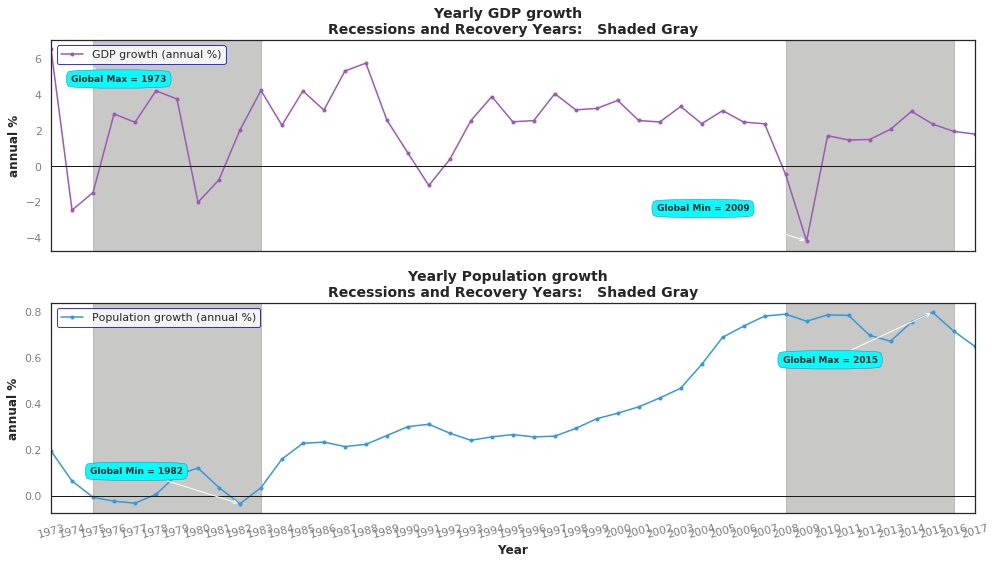

In [94]:
mpl.rcParams['font.family'] = 'Ubuntu Mono'
fig, axes = plt.subplots(2,1, figsize=(14,8), sharex=True)
df[plot_cols].plot(subplots=True, ax=axes, marker='o', ms=3)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, plot_cols):
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    # lets add horizontal zero lines
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    
    # add titles
    ax.set_title('Yearly ' + col.split('(')[0] + ' \nRecessions and Recovery Years:   Shaded Gray', fontsize=14, fontweight='demi')
    
    # add axis labels
    ax.set_ylabel('annual %', fontsize=12, fontweight='demi')
    ax.set_xlabel('Year', fontsize=12, fontweight='demi')
    
    # upgrade axis tick labels
    #yticks = ax.get_yticks()
    #ax.set_yticklabels(['{}'.format(x) for x in yticks]);

    #dates_rng = pd.date_range(df.index[0], df.index[-1], freq='6M')
    #plt.xticks(dates_rng, [dtz.strftime('%Y-%m-%d') for dtz in dates_rng], rotation=45)
    #skip every one x-tick for cleanliness
    plt.setp(ax1.get_xticklabels()[::2], visible=False)
    #plt.xticks([t.get_text().split("T")[0] for t in ax1.get_xticklabels()])
    plt.xticks(range(len(list(df['Year']))),list(df['Year']), rotation = 15)
    
    
    # bold up tick axes
    ax.tick_params(axis='both', which='major', labelsize=11)
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')
    
    # lighten ticks and labels
    ax.tick_params(colors='gray', direction='out')
    #for tick in ax.get_xticklabels():
        #tick.set_color('gray')
    #for tick in ax.get_yticklabels():
        #tick.set_color('gray')

# add global max/min annotations
# add cool annotation box
bbox_props = dict(boxstyle="round4, pad=0.6", fc="cyan", ec="b", lw=.5)

axes[0].annotate('Global Max = {}'
                 .format(1973),
            fontsize=9,
            fontweight='bold',
            xy=(spx_max_idx_, spx_max_),  
            xycoords='data',
            xytext=(20, -32),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props)    

axes[0].annotate('Global Min = {}'
                 .format(2009),
            fontsize=9,
            fontweight='demi',
            xy=(spx_min_idx_, spx_min_),  
            xycoords='data',
            xytext=(-150, 30),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props) 

axes[1].annotate('Global Max = {}'
                 .format(2015),
            fontsize=9,
            fontweight='bold',
            xy=(vix_max_idx_, vix_max_),  
            xycoords='data',
            xytext=(-150, -50),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props)    

axes[1].annotate('Global Min = {}'
                 .format(1982),
            fontsize=9,
            fontweight='demi',
            xy=(vix_min_idx_, vix_min_),  
            xycoords='data',
            xytext=(-150, 30),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props) 

# now to use tight layout
plt.tight_layout()

### exam question for advanced data mining: How do you select the best decision trees .. which attribute is the best? Decision Tree

In [31]:
df.columns

Index(['Unnamed: 0', 'Year', 'GDP (current US$)', 'GDP per capita (current US$)', 'GDP growth (annual %)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)', 'Consumer price index (2010 = 100)', 'Tax revenue (% of GDP)', 'Rural population',
       'Rural population (% of total population)', 'Rural population growth (annual %)', 'Urban population', 'Urban population (% of total)',
       'Urban population growth (annual %)', 'Employment to population ratio, 15+, female (%) (national estimate)',
       'Employment to population ratio, 15+, male (%) (national estimate)', 'Employment to population ratio, 15+, total (%) (national estimate)',
       'Employment to population ratio, ages 15-24, female (%) (national estimate)', 'Employment to population ratio, ages 15-24, male (%) (national estimate)',
       'Employment to population ratio, ages 15-24, total (%) (national estimate)', 'Ratio of female to male labor force participation rate (%) (national estimate)'

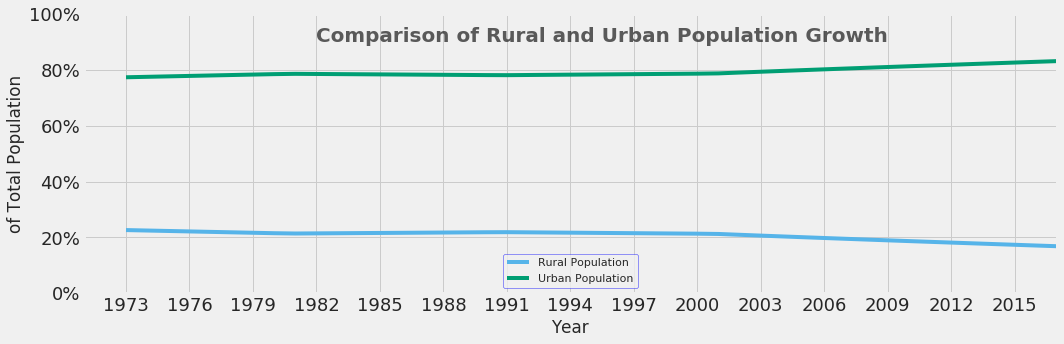

In [262]:
#https://www.dataquest.io/blog/making-538-plots/
import matplotlib.style as style
style.use('fivethirtyeight')
# Colorblind-friendly colors
colors = [[86/255,180/255,233/255],[0,158/255,115/255],[213/255,94/255,0], [0,114/255,178/255],   
          [0,0,0], [230/255,159/255,0]]

#dfru = df[['Year','Rural population (% of total population)','Urban population (% of total)']]
fte_graph = df.plot(x = 'Year', y = ['Rural population (% of total population)','Urban population (% of total)'], figsize = (15,5), color = colors)
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Customizing the tick labels of the y-axis 
fte_graph.set_ylim(0,100)
# Generate a bolded horizontal line at y = 0 
fte_graph.axhline(y = 0, color = 'blue', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
fte_graph.set_xlim(left = 1971, right = 2017)
# Remove the label of the x-axis
#fte_graph.xaxis.label.set_visible(False)
# Adding a title and a subtitle
fte_graph.text(x = 1982, y = 90, s = "Comparison of Rural and Urban Population Growth",
               fontsize = 20, weight = 'bold', alpha = .75)
# add cool legend
fte_graph.legend(['Rural Population','Urban Population'],loc='lower center', fontsize=11, frameon=True).get_frame().set_edgecolor('blue') 
fte_graph.set_xlabel('Year')
fte_graph.set_ylabel('of Total Population')
fte_graph.set_xticks((df['Year'])[::3])
#ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.tight_layout()
plt.savefig("urbanVsRural.png")
#plt.show()

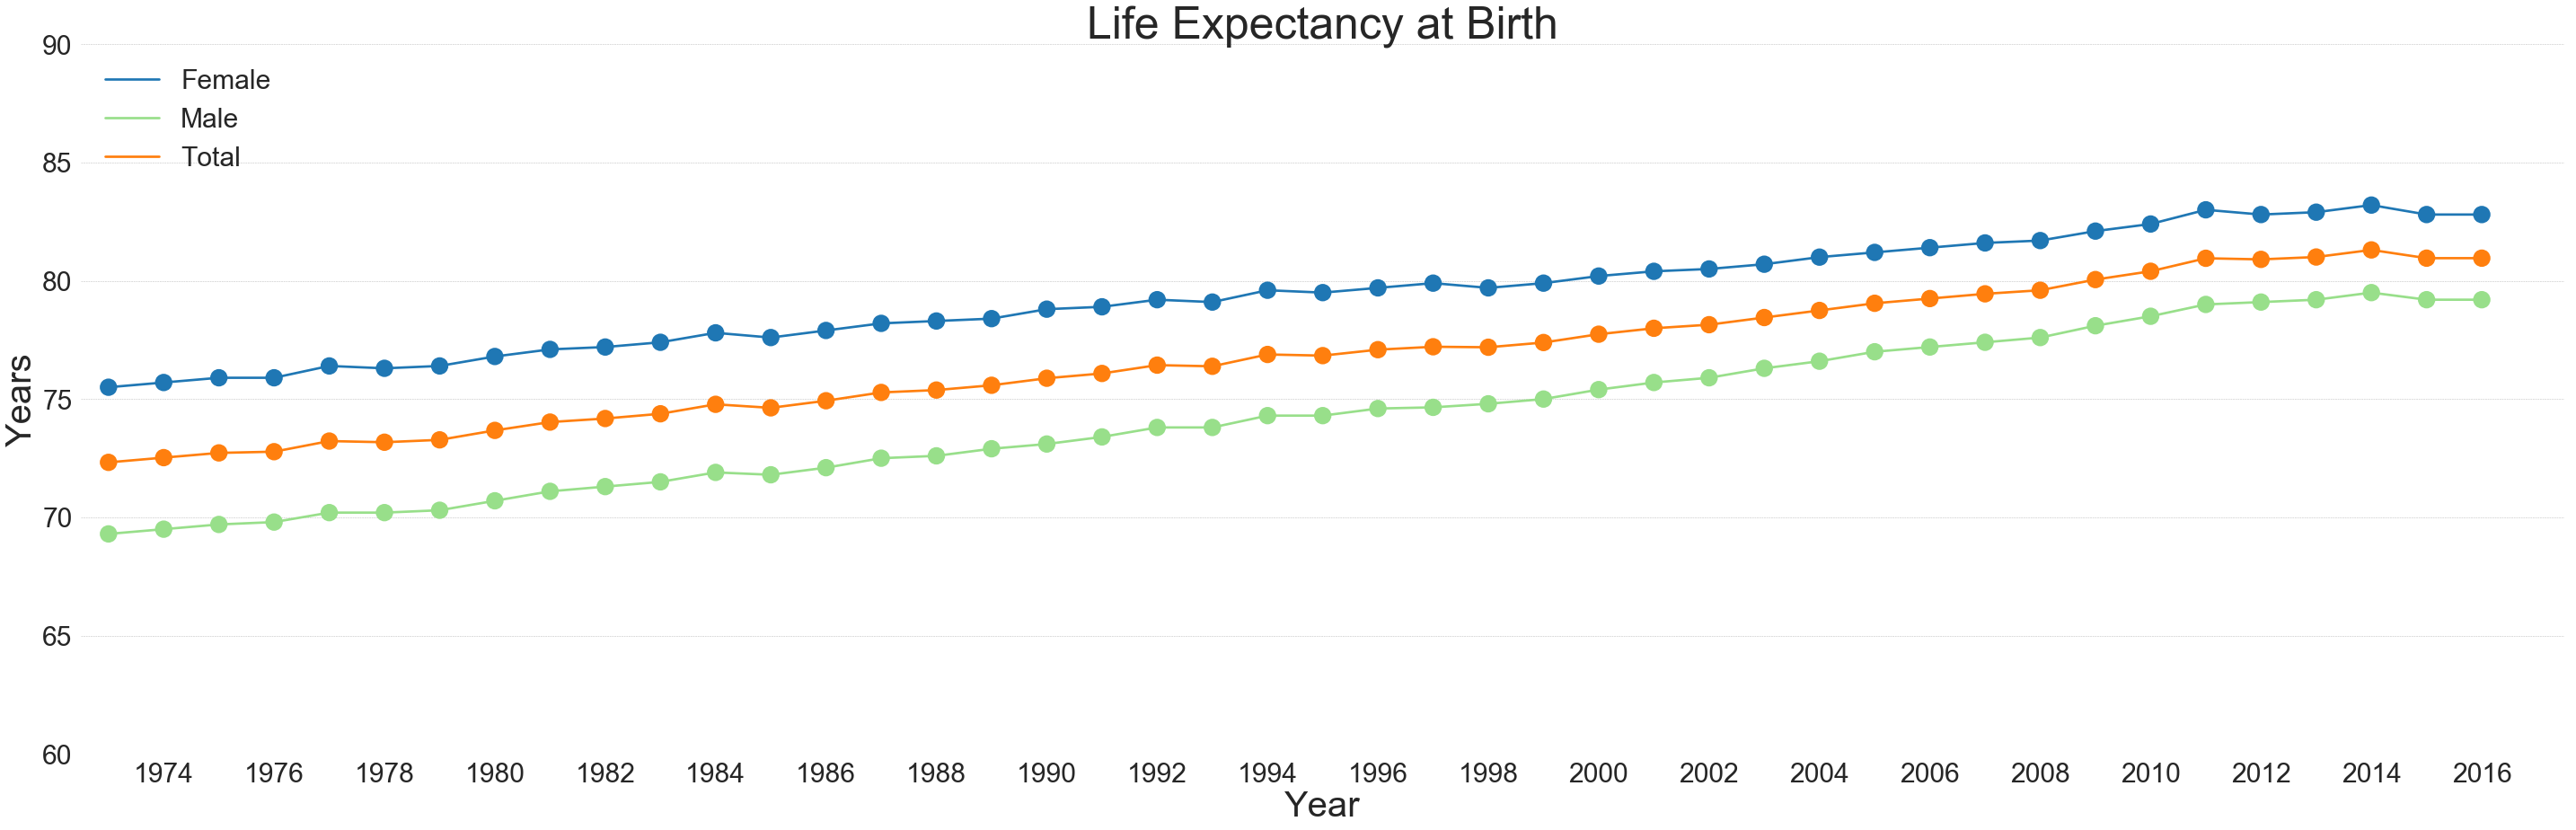

In [214]:
#https://matplotlib.org/gallery/showcase/bachelors_degrees_by_gender.html#sphx-glr-gallery-showcase-bachelors-degrees-by-gender-py
# These are the colors that will be used in the plot
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

 
sns.set(style="whitegrid")
# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(30, 4))
#two plots together
f, (ax1) = plt.subplots(1,figsize=(40, 13))

sns.pointplot(x= "Year",y='Life expectancy at birth, female (years)',  data=df, ax=ax1,color= color_sequence[0])
sns.pointplot(x="Year", y="Life expectancy at birth, male (years)", data=df, ax=ax1,color= color_sequence[5])
sns.pointplot(x="Year", y='Life expectancy at birth, total (years)', data=df, ax=ax1,color= color_sequence[2])

# Plot the total 
sns.set_color_codes("deep")
#sns.scatterplot(x="Year", y='GDP (current US$)', data=dfe, color="r")
sns.despine()
# Remove the plot frame lines. They are unnecessary here.
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
#ax.set_xlim(1969.5, 2011.1)
ax1.set_ylim(60, 90)

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted.
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

plt.title('Life Expectancy at Birth', fontsize= 50)
plt.xlabel('Year', fontsize= 40)
plt.xticks(fontsize=30)
plt.ylabel('Years', fontsize= 40)
plt.yticks(fontsize=30)
#skip every one x-tick for cleanliness
plt.setp(ax1.get_xticklabels()[::2], visible=False)
ax1.legend(handles=ax1.lines[::len(df)+1], labels=["Female","Male",'Total'],frameon=False, loc='upper left',fontsize= 30)
plt.setp(ax1.collections, sizes=[300])
plt.tight_layout()
plt.savefig("lifeexpentacy.png")
#plt.show()

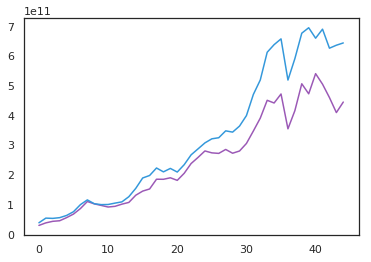

In [21]:
plt.plot(df[['Merchandise exports (current US$)', 'Merchandise imports (current US$)']])

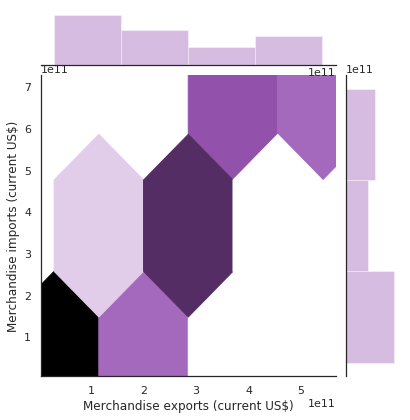

In [25]:
sns.jointplot(x='Merchandise exports (current US$)', y='Merchandise imports (current US$)',kind="hex", data=df)

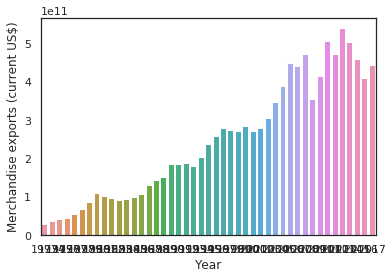

In [26]:
ax = sns.barplot(x="Year", y="Merchandise exports (current US$)", data=df)

In [27]:
f = df[['Year','Merchandise exports (current US$)','Merchandise imports (current US$)']]
f.groupby(f.index // 4 * 4).sum().head(11)

,Year,Merchandise exports (current US$),Merchandise imports (current US$)
0,7898,1.566123e+11,2.018029e+11
4,7914,3.202774e+11,3.541491e+11
8,7930,3.847280e+11,4.071590e+11
12,7946,4.847670e+11,5.790340e+11
16,7962,7.124840e+11,8.522060e+11
20,7978,8.829400e+11,9.979760e+11
24,7994,1.111947e+12,1.301706e+12
28,8010,1.206031e+12,1.577894e+12
32,8026,1.755766e+12,2.427989e+12
36,8042,1.750214e+12,2.482289e+12


Removed 2017 from the list

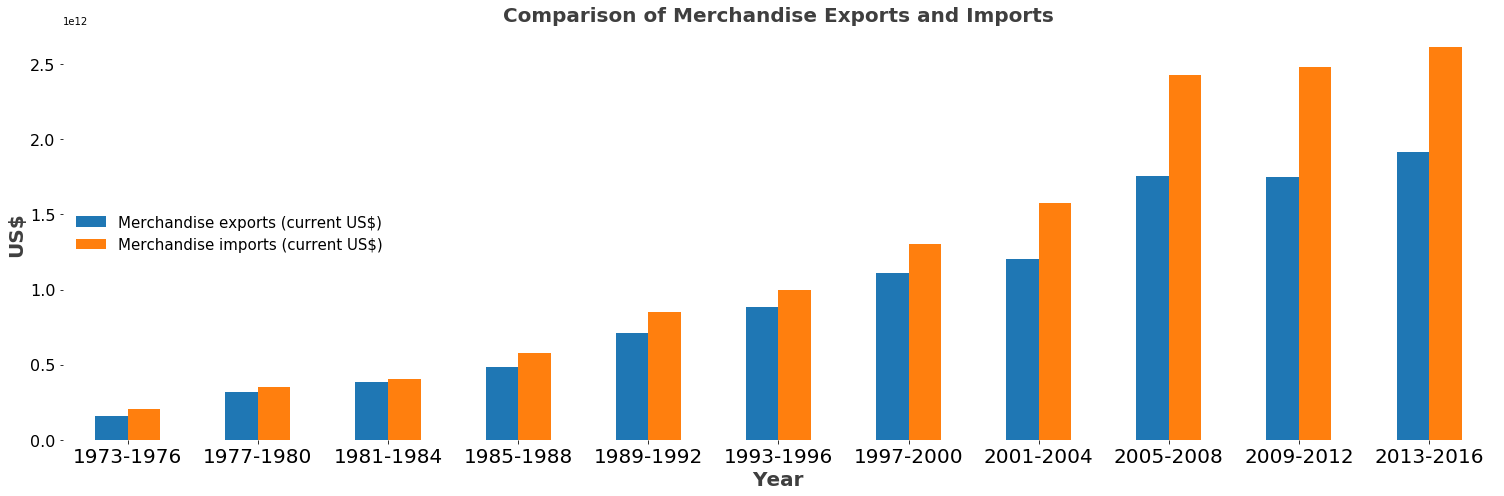

In [28]:
s = df[['Merchandise exports (current US$)','Merchandise imports (current US$)']]
#s.set_index(['1973-1977','1978-1982','1983-1987','1988-1992','1993-1997','1998-2002','2003-2007','2008-2012','2013-2018'], inplace = True)
s = s.groupby(s.index // 4 * 4).sum().head(11)
s.index = ['1973-1976','1977-1980','1981-1984','1985-1988','1989-1992','1993-1996','1997-2000','2001-2004','2005-2008','2009-2012','2013-2016']
s = s.reset_index()
sns.despine()
fte_graph = s.plot.bar(x = 'index', y = ['Merchandise exports (current US$)','Merchandise imports (current US$)'],stacked=False, figsize = (21,7))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 16)
# Customizing the tick labels of the y-axis 

# Adding a title and a subtitle

plt.title("Comparison of Merchandise Exports and Imports",fontsize = 20, weight = 'bold', alpha = .75)
# add cool legend
fte_graph.legend(
    fontsize=11, frameon=True).get_frame().set_edgecolor('blue') 
fte_graph.set_xlabel('Year',fontsize = 20, weight = 'bold', alpha = .75)
fte_graph.set_ylabel('US$',fontsize = 20, weight = 'bold', alpha = .75)
plt.xticks(rotation='horizontal',fontsize= 20)
# Pad margins so that markers don't get clipped by the axes
plt.margins()
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
fte_graph.legend(frameon=False, loc='center left',fontsize= 15)
#fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

# Remove the plot frame lines. They are unnecessary here.
fte_graph.spines['top'].set_visible(False)
fte_graph.spines['bottom'].set_visible(False)
fte_graph.spines['right'].set_visible(False)
fte_graph.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("importVsExport-new.png")

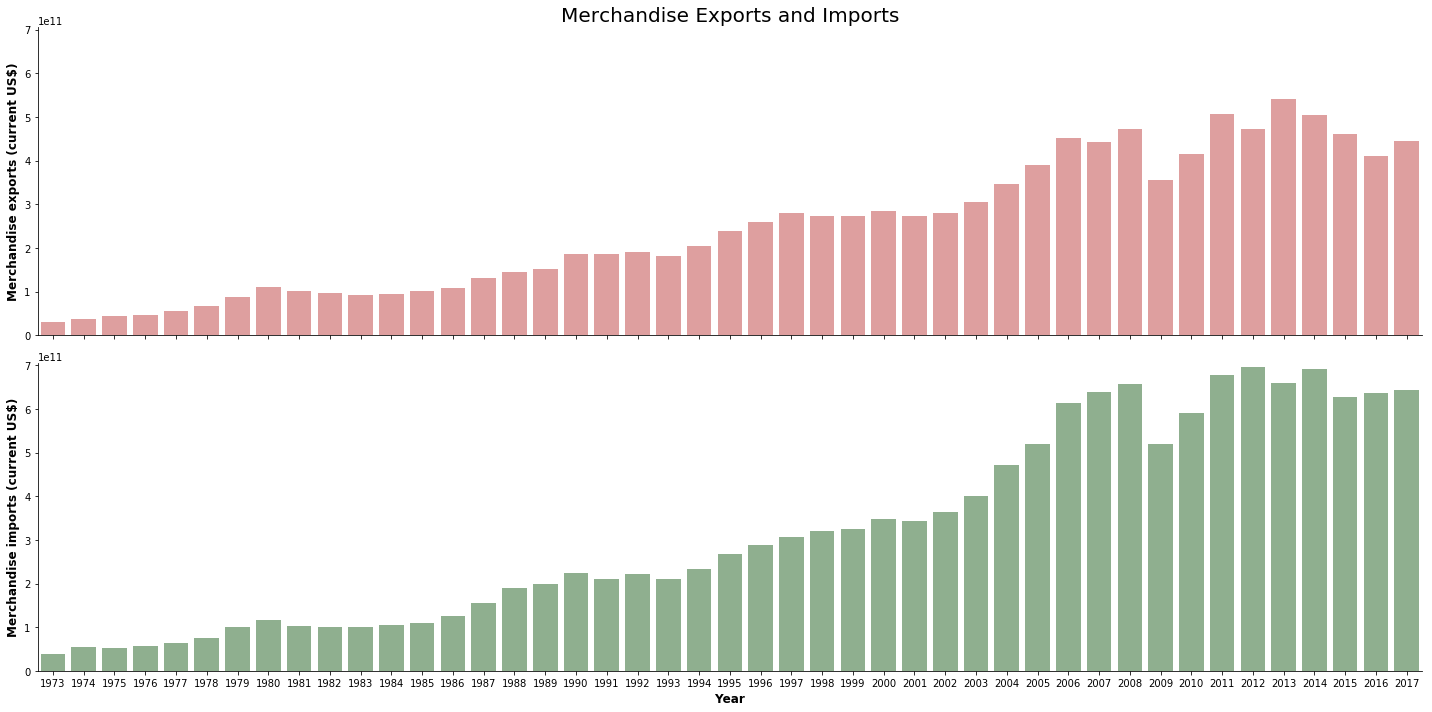

In [3]:
f, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), sharex=True)
# Plot the total 

#sns.scatterplot(x="Year", y='GDP (current US$)', data=dfe, color="r")
sns.despine()
sns.barplot(x ='Year',y= "Merchandise exports (current US$)", data=df, ax=ax1, color="red", saturation=.5,alpha =0.5).set_title("Merchandise Exports and Imports", fontsize=20)
sns.regplot(x ='Year',y= "Merchandise exports (current US$)", data=df, ax=ax1)
sns.barplot(x ='Year',y="Merchandise imports (current US$)", data=df, ax=ax2, color="green", saturation=.5,alpha=0.5)
# Remove the label of the x-axis
ax1.xaxis.label.set_visible(False)
ax1.set_ylim(0,705220440640.0) #max import 695220440640.0
ax2.set_ylim(0, 705220440640.0)
#ax1.title('Merchandise Exports and Imports', fontsize= 40)
ax1.set_ylabel('Merchandise exports (current US$)', fontsize=12, fontweight='demi')
ax2.set_ylabel('Merchandise imports (current US$)',fontsize=12, fontweight='demi')
ax2.set_xlabel('Year', fontsize=12, fontweight='demi')


plt.tight_layout()
plt.savefig("importVsExport.png")

In [47]:
df['Merchandise exports (current US$)'] = df['Merchandise exports (current US$)'].map(lambda x: '{:.0f}'.format(x))

In [227]:
df['Merchandise exports (current US$)'].map(lambda x: float(x))

0     2.963730e+10
1     3.819660e+10
2     4.342290e+10
3     4.535550e+10
4     5.585990e+10
5     6.788660e+10
6     8.639690e+10
7     1.101340e+11
8     1.022440e+11
9     9.698400e+10
10    9.161900e+10
11    9.388100e+10
12    1.012520e+11
13    1.070930e+11
14    1.312570e+11
15    1.451650e+11
16    1.523450e+11
17    1.851720e+11
18    1.849640e+11
19    1.900030e+11
20    1.813810e+11
21    2.050790e+11
22    2.379530e+11
23    2.585270e+11
24    2.804060e+11
25    2.739490e+11
26    2.721666e+11
27    2.854253e+11
28    2.727152e+11
29    2.801951e+11
30    3.056271e+11
31    3.474935e+11
32    3.908600e+11
33    4.509070e+11
34    4.418308e+11
35    4.721677e+11
36    3.548930e+11
37    4.159590e+11
38    5.065700e+11
39    4.727919e+11
40    5.406159e+11
41    5.052048e+11
42    4.601535e+11
43    4.095783e+11
44    4.449816e+11
Name: Merchandise exports (current US$), dtype: float64

In [49]:
df['Merchandise imports (current US$)'] = df['Merchandise imports (current US$)'].map(lambda x: '{:.0f}'.format(x))

ValueError: Could not interpret input 'df['Merchandise exports (current US$)']'

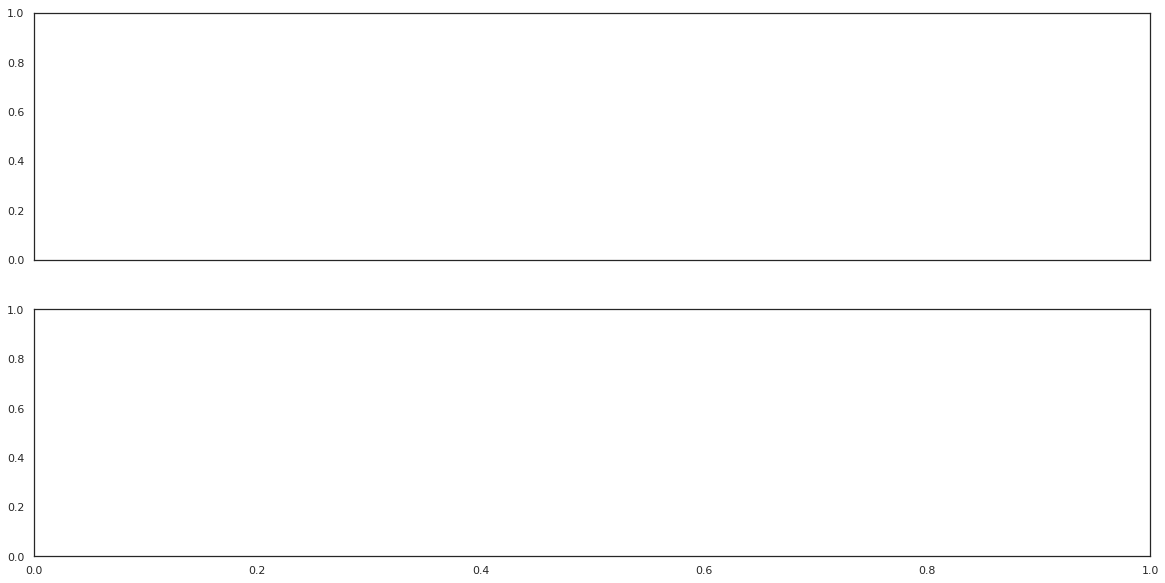

In [55]:
f, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), sharex=True)
sns.barplot(x ='Year',y= "df['Merchandise exports (current US$)']", data=df, ax=ax1, color="salmon", saturation=.5)
sns.barplot(x ='Year',y="df['Merchandise imports (current US$)']", data=df, ax=ax2, color="green", saturation=.5)